In [1]:
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs

In [2]:
df1 = pd.read_csv('train.csv')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df1['Survived'].value_counts()  # 'Survived' is the target column

0    549
1    342
Name: Survived, dtype: int64

In [20]:
df1_clean = df1[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

In [10]:
# Pairplot for selected features
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df1_selected = df1[selected_features].copy()
df1_selected['Sex'] = df1_selected['Sex'].map({'male': 0, 'female': 1})  # Encode for pairplot

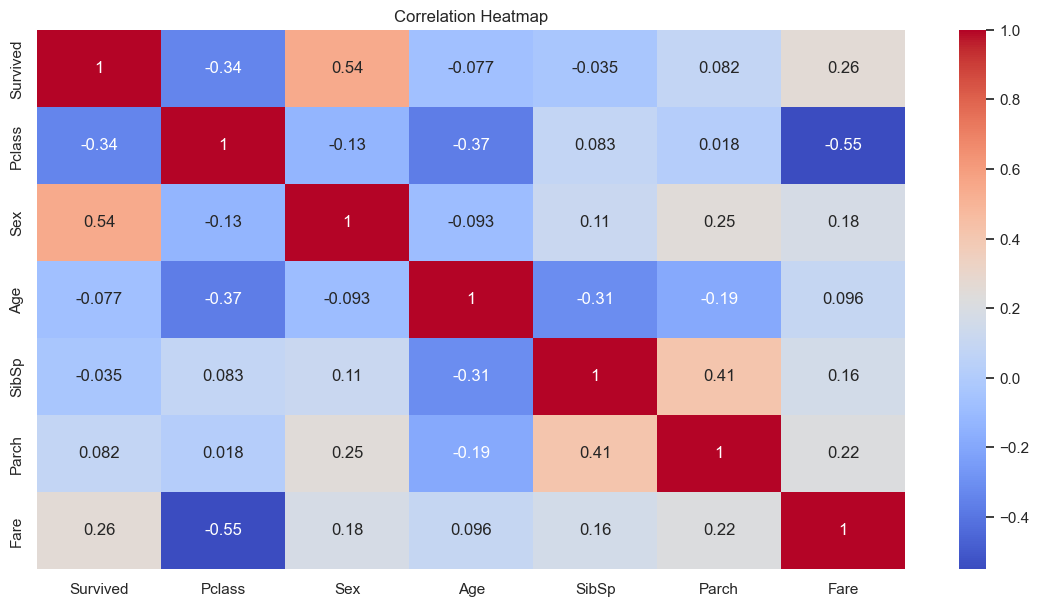

In [12]:
 #Heatmap of correlation
correlation_matrix = df1_selected.corr()

# Plotting
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Positive correlations with survival:

Sex (encoded: female → 1): strongly related.

Fare: higher fare slightly associated with survival.

Parch (parents/children aboard) slightly positive.

Negative correlations:

Pclass (Passenger Class): higher class (lower number) relates to better survival.

SibSp (siblings/spouse): slight negative trend.

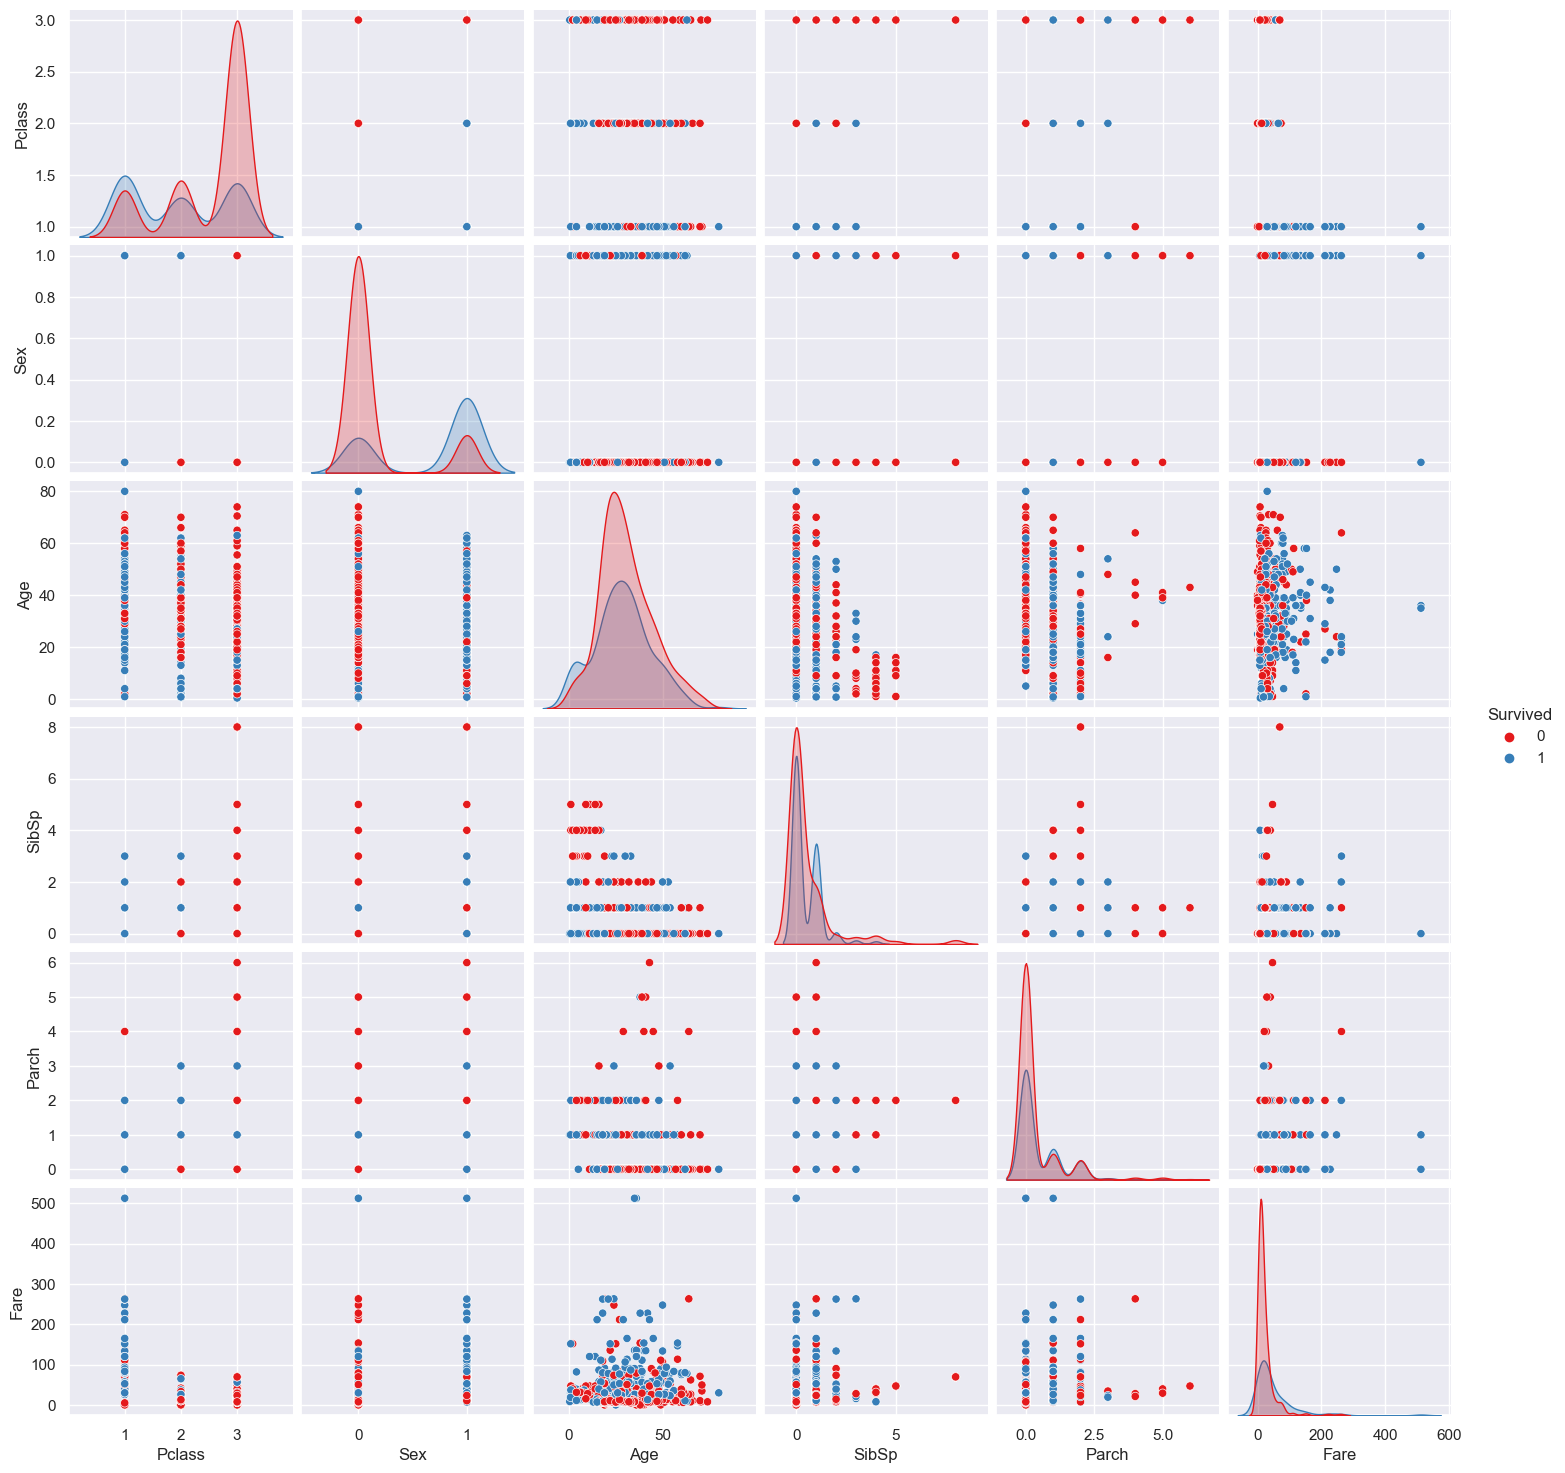

In [14]:
pairplot_fig = sns.pairplot(df1_selected, hue='Survived', palette='Set1')
plt.show()

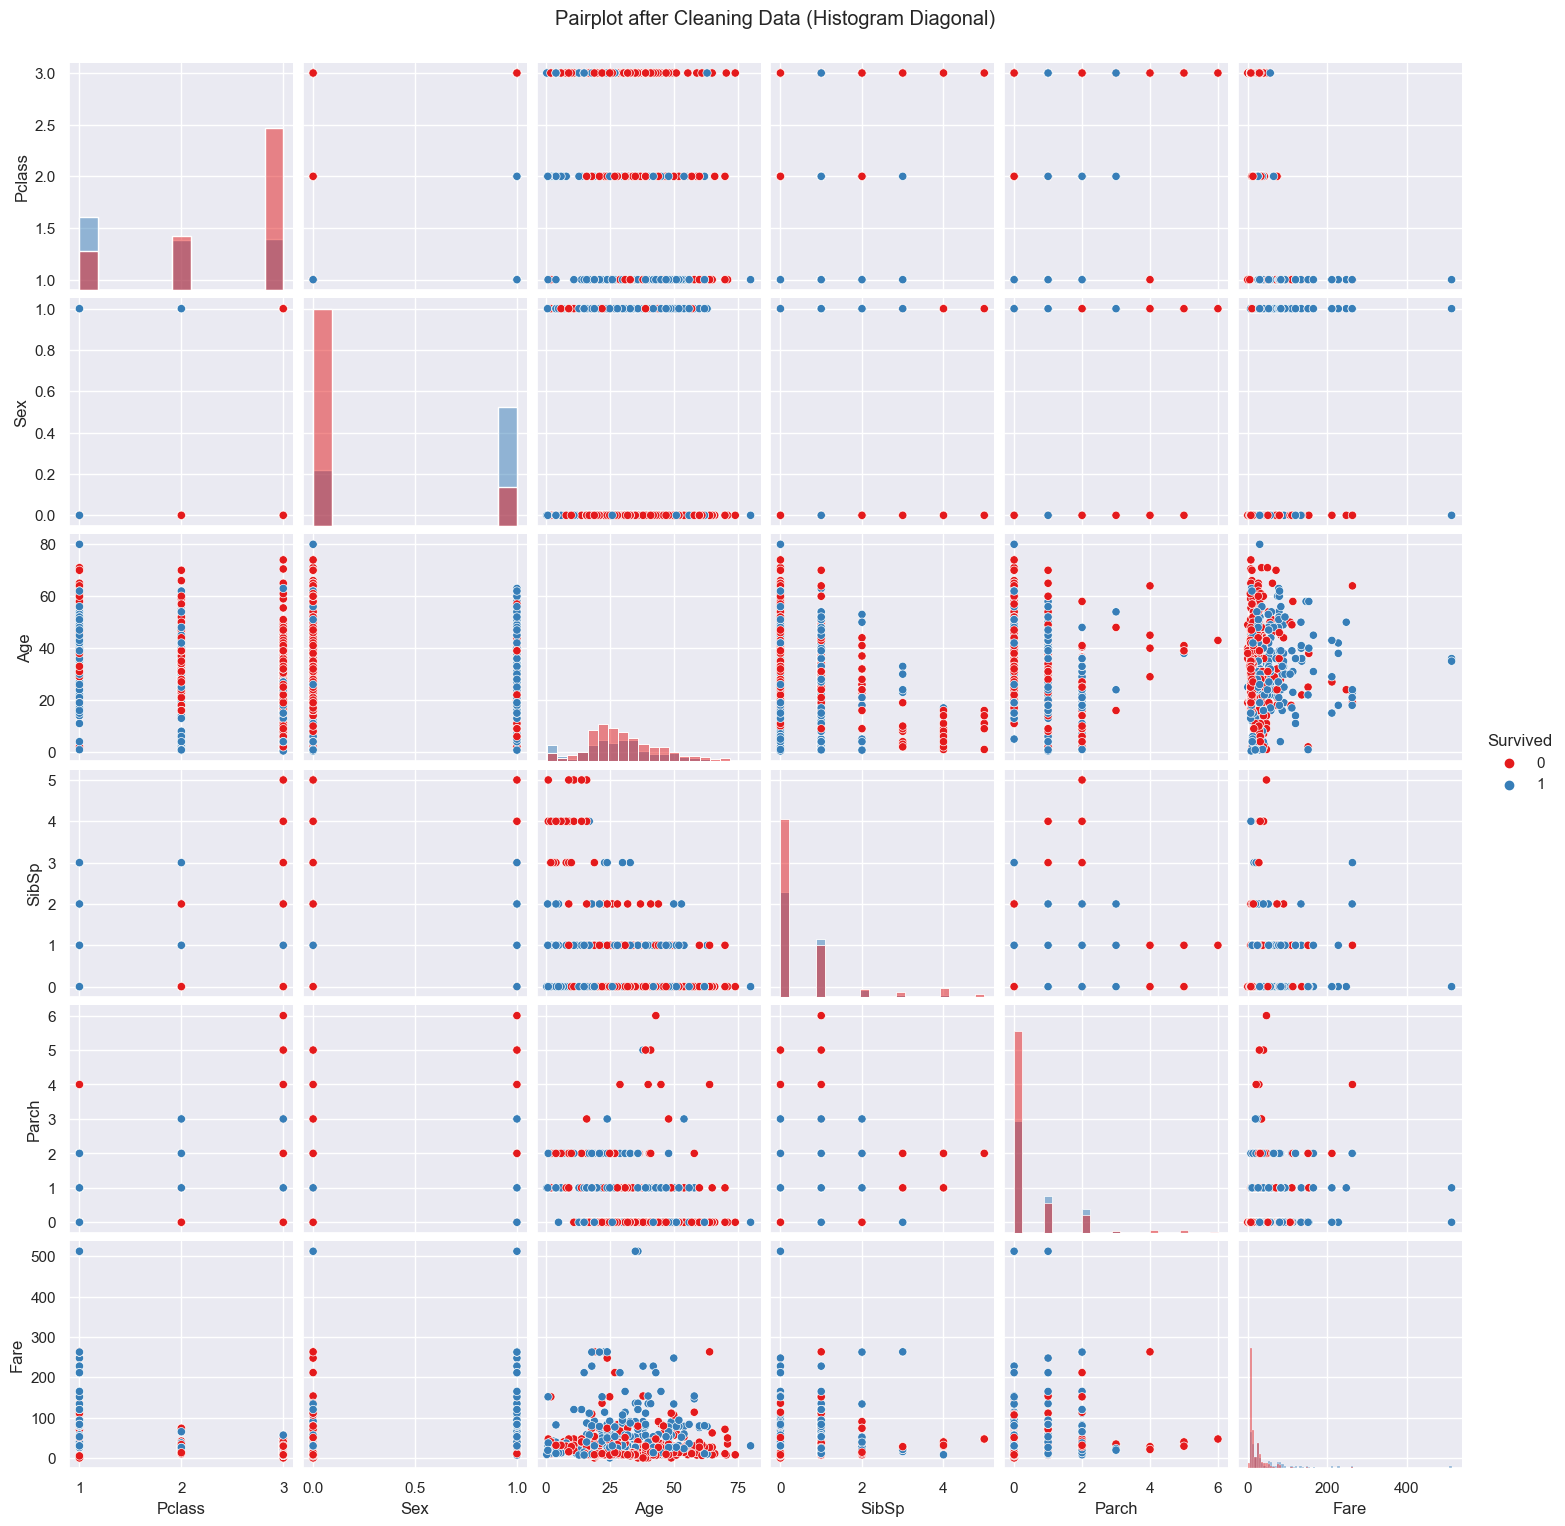

In [16]:
# Ensure all columns are numeric and no missing values
df1_selected_cleaned = df1_selected.dropna()
df1_selected_cleaned = df1_selected_cleaned.apply(pd.to_numeric, errors='coerce')

# Now create the pairplot again using histograms on the diagonal
pairplot_fig = sns.pairplot(df1_selected_cleaned, hue='Survived', palette='Set1', diag_kind='hist')
plt.suptitle('Pairplot after Cleaning Data (Histogram Diagonal)', y=1.02)
plt.show()


Sex (encoded) strongly separates survivors vs non-survivors (Females survived more).

Pclass shows a trend: people in 1st class had higher survival chances than 2nd and 3rd.

Age: Younger passengers had slightly better survival rates.

Fare: Higher fare = higher survival probability (likely 1st class passengers).

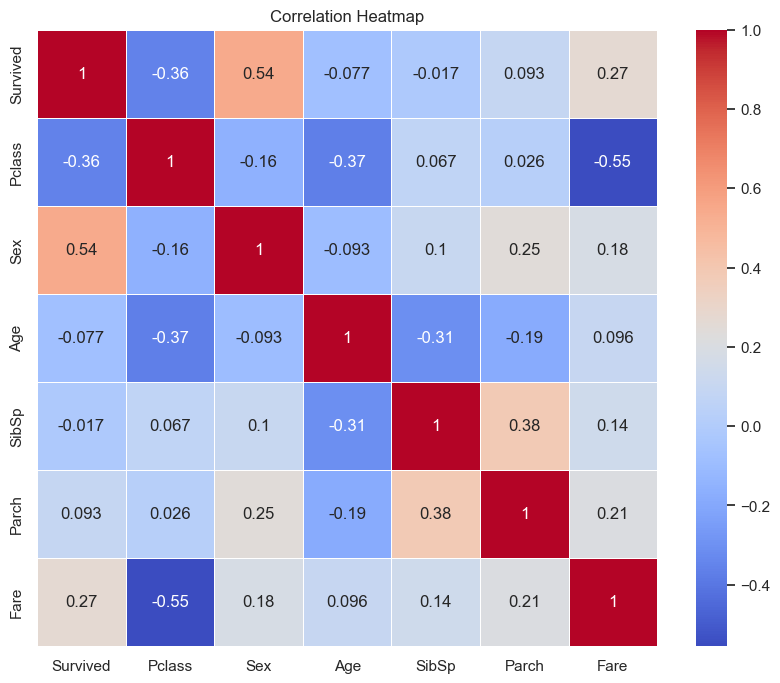

In [17]:
corr_matrix = df1_selected_cleaned.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Strongest correlations:**

Sex (encoded 0/1) had a high positive correlation with Survived (women survived more).

Pclass showed a negative correlation with Survived (higher class → better survival chances).

Fare had a positive correlation (higher fare → better survival chances).

**Weak/Minor correlations:**

Age, SibSp, and Parch had much weaker (but still visible) relationships with survival.



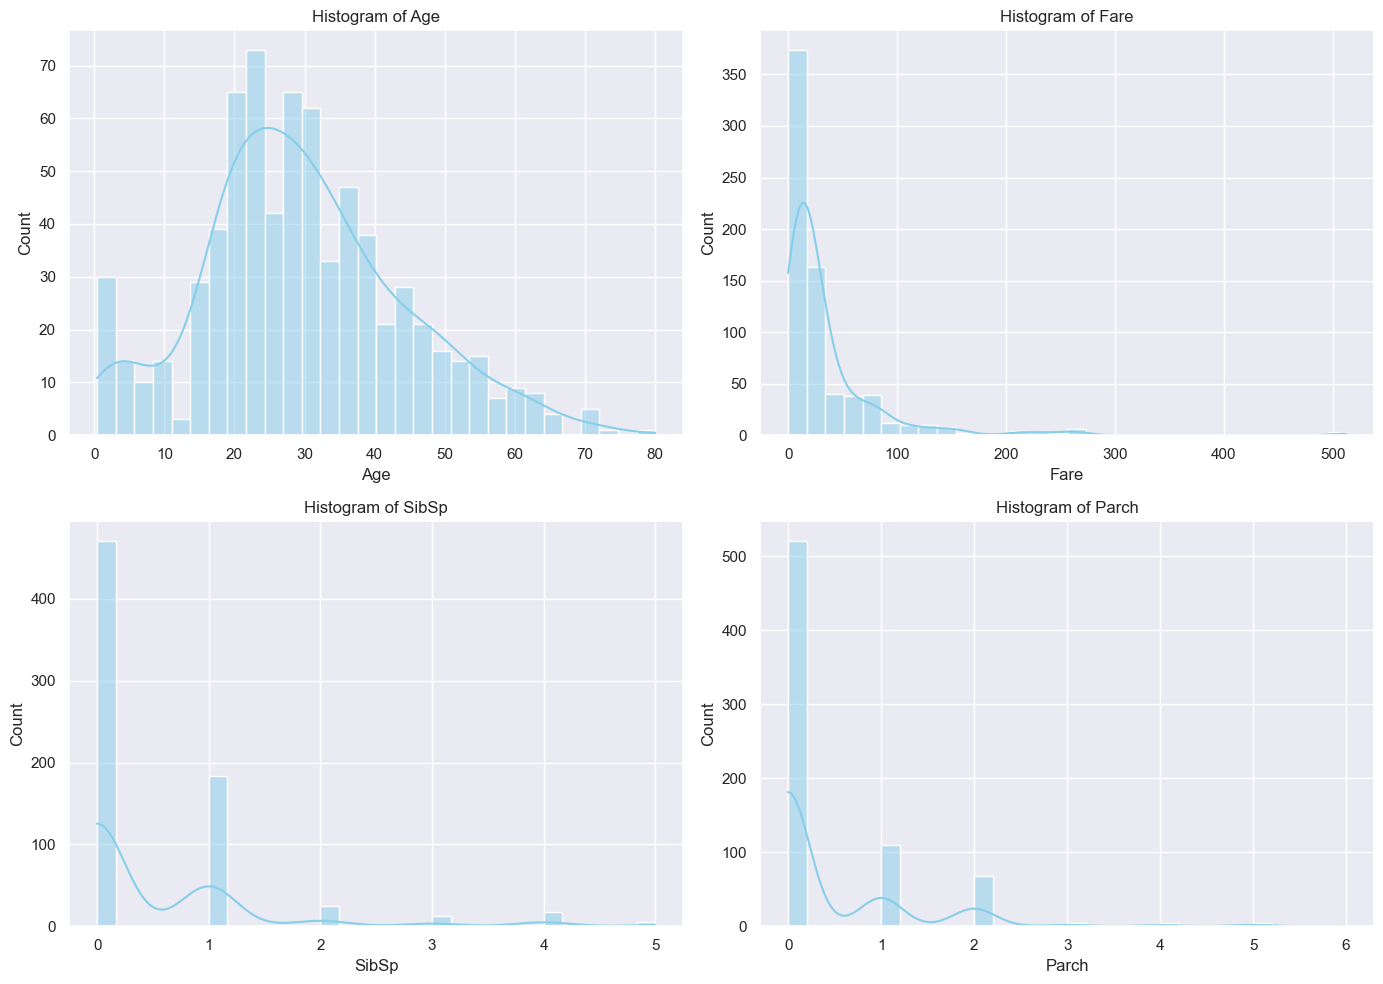

In [21]:
features = ['Age', 'Fare', 'SibSp', 'Parch']
plt.figure(figsize=(14,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.histplot(df1_clean[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

 Observation
 - Most passengers were between 20 to 40 years old.
 - Distribution is slightly right-skewed.
 - Fewer very young (infants) and very old passengers.
 - Majority of passengers paid a low fare (0–50 units).
 - A few passengers paid very high fares (outliers above 100–500).
 - Highly right-skewed distribution.
 - Most people had 0 siblings/spouse aboard.
 - A few had 1–2 companions; very few had 3 or more.
 - Single travelers were very common.
 - Majority had 0 parents/children aboard.
 - Small peaks at 1 and 2.
 - Traveling alone was common.

Text(0.5, 1.0, 'Boxplot of Age by Survival')

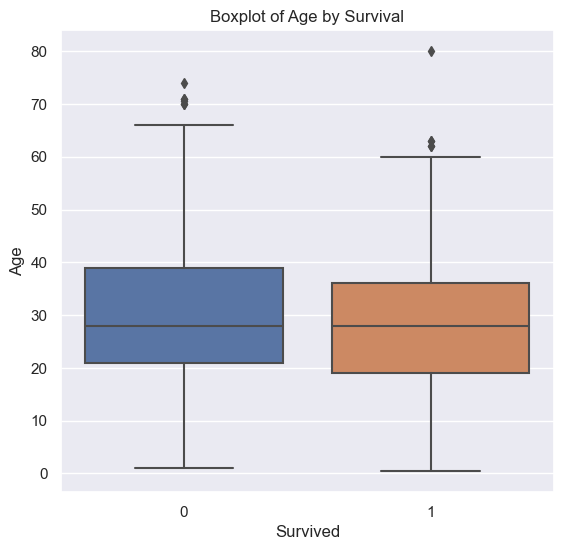

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='Survived', y='Age', data=df1_clean)
plt.title('Boxplot of Age by Survival')

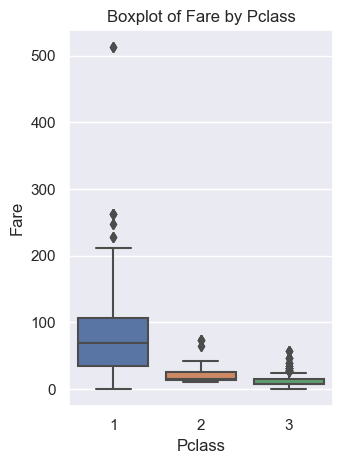

In [25]:
plt.subplot(1,2,2)
sns.boxplot(x='Pclass', y='Fare', data=df1_clean)
plt.title('Boxplot of Fare by Pclass')

plt.tight_layout()
plt.show()

Observation
 - Survivors' median age is slightly lower than non-survivors.
 - Many young children (low age) survived.
 - Non-survivors show a wider spread of older ages.
 - 1st class passengers paid much higher fares compared to 2nd and 3rd classes.
 - 3rd class fares were tightly packed around low values.
 - Some high-end outliers even within 1st class (luxury passengers).

Text(0.5, 1.0, 'Fare vs Age colored by Survival')

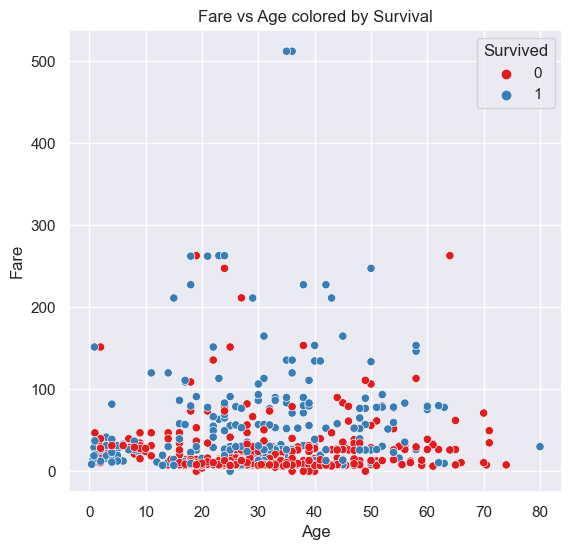

In [26]:
plt.figure(figsize=(14,6))

# Fare vs Age
plt.subplot(1,2,1)
sns.scatterplot(x='Age', y='Fare', hue='Survived', palette='Set1', data=df1_clean)
plt.title('Fare vs Age colored by Survival')

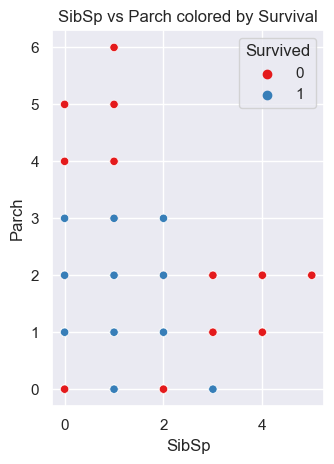

In [27]:
plt.subplot(1,2,2)
sns.scatterplot(x='SibSp', y='Parch', hue='Survived', palette='Set1', data=df1_clean)
plt.title('SibSp vs Parch colored by Survival')

plt.tight_layout()
plt.show()

Observation
 - Higher fare passengers had higher survival rates (mostly red or pink in plot for survivors).
 - Younger passengers who paid more (probably first class) survived more.
 - Many low-fare, older passengers did not survive.
 - Majority of passengers clustered at (0,0).
 — no siblings, no parents.
 - Some survivors clustered around small family groups (1–2).
 - Very large families (>3 relatives) had lower survival rates overall.

**Summary**

- Most passengers aged 20–40 years; fewer very young or very old 
- Young passengers had slightly better survival rates
- Most fares were low (0–50); a few very high outliers 
- Higher fare passengers (likely 1st class) survived more
- Most traveled alone (SibSp=0) | Single travelers generally had lower survival
- Most had no parents/children aboard | Family presence (small size) helped survival slightly
- Survivors slightly younger than non-survivors 
- Younger passengers survived at higher rates
- 1st class passengers paid much higher fares 
- Passenger class (Pclass) strongly influenced survival
- Higher fare, younger passengers had higher survival 
- Wealth and youth were survival advantages
- Small families survived more; large families struggled 
- Small family groups had higher survival